In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import gc
from skimage import io
import matplotlib.pyplot as plt
import scipy.linalg as lng
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sys import getsizeof
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

%matplotlib inline
%run my_functions.ipynb

In [2]:
data_path = '../data/Faces/'
labels_path = '../data/labels.csv'
result_path = '../results'
names_path = "../data/filenames.txt"
file_data_path = "../files"
data_set_gray_npy = os.path.join(file_data_path, 'data_gray.npy')
data_set_rgb_npy = os.path.join(file_data_path, 'data_rgb.npy')
labels_csv_path = os.path.join(file_data_path, 'data_rgb.npy')

In [3]:
# Open a random image to get dimensions
h, w = get_dimensions_from_an_image(data_path, 0, as_gray=True)

In [4]:
# Get labels as pandas object from labels.csv
labels = get_labels_df(
    labels_path=labels_path, names_path=names_path)
labels

,actual_filename,image_no,age,gender,race
0,100_0_0_20170112213500903.jpg.chip.jpg,0,100,0,0
1,100_0_0_20170112215240346.jpg.chip.jpg,1,100,0,0
2,100_1_0_20170110183726390.jpg.chip.jpg,2,100,1,0
3,100_1_0_20170112213001988.jpg.chip.jpg,3,100,1,0
4,100_1_0_20170112213303693.jpg.chip.jpg,4,100,1,0
...,...,...,...,...,...
23700,9_1_3_20161220222856346.jpg.chip.jpg,23700,9,1,3
23701,9_1_3_20170104222949455.jpg.chip.jpg,23701,9,1,3
23702,9_1_4_20170103200637399.jpg.chip.jpg,23702,9,1,4
23703,9_1_4_20170103200814791.jpg.chip.jpg,23703,9,1,4


In [5]:
X = np.load(data_set_gray_npy)
dirs = os.listdir(data_path)

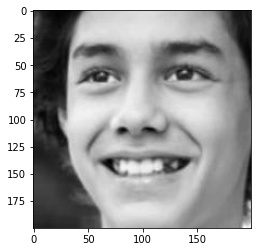

In [6]:
# Show an image for verification
plt.imshow(X[100].reshape(200,200), cmap=plt.cm.gray)

In [7]:
start_age = 20
end_age = 30
cut_index = labels.query('age >= @start_age and age <= @end_age')

In [9]:
cut_index.shape

(8068, 5)

In [10]:
X = X[cut_index.index]

In [ ]:
# Do PCA before clustering. Classic case of dimensiolity reduction
# We will now use PCA on our dataset to reduce our dimensions. We will pick our retained variance of 0.98 
# This needs to be explained using image reconstruction error and components to variance analysis
variance = 0.98 
pca = PCA(variance)
pca.fit(X_cut)